Imports

In [103]:
import feed_forward
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import geoopt
from time import time
from torchvision import datasets, transforms
import helper
torch.cuda.is_available()

True

CUDA check

In [104]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Data Transformation

In [105]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

Training and Test data from MNIST data set

In [106]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
n_inputs = 784
    
print(trainset[1])
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=512, shuffle=True)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

Initializing the model

In [107]:
model = feed_forward.HypFF()
model.to(device)

HypFF(
  (fc1): MobLinear(
    in_features=784, out_features=512, bias=True
    (ball): PoincareBall manifold
  )
  (fc2): MobLinear(
    in_features=512, out_features=256, bias=True
    (ball): PoincareBall manifold
  )
  (fc3): MobLinear(
    in_features=256, out_features=10, bias=True
    (ball): PoincareBall manifold
  )
)

In [108]:
print(model)

HypFF(
  (fc1): MobLinear(
    in_features=784, out_features=512, bias=True
    (ball): PoincareBall manifold
  )
  (fc2): MobLinear(
    in_features=512, out_features=256, bias=True
    (ball): PoincareBall manifold
  )
  (fc3): MobLinear(
    in_features=256, out_features=10, bias=True
    (ball): PoincareBall manifold
  )
)


Hyperparameters

In [109]:
learning_rate = 16e-4
momentum = 0.9

Loss Function

In [110]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images, labels = images.to(device), labels.to(device)
images = images.view(images.shape[0], -1)

out = model(images) #output
print(out)
loss = criterion(out, labels) #calculate the loss

tensor([[ 0.0238, -0.0596,  0.0249,  ...,  0.0286, -0.0196, -0.0389],
        [ 0.0338, -0.0121,  0.0285,  ..., -0.0002, -0.0314, -0.0305],
        [ 0.0391, -0.0168, -0.0351,  ...,  0.0889, -0.0251,  0.0212],
        ...,
        [ 0.0178, -0.0073, -0.0451,  ...,  0.0626, -0.0386,  0.0352],
        [ 0.0279, -0.0351,  0.0278,  ...,  0.0237, -0.0179,  0.0139],
        [ 0.0709, -0.0308,  0.0100,  ...,  0.0233, -0.0032, -0.0142]],
       device='cuda:0', grad_fn=<SWhereBackward>)


Optimizer

In [111]:
optimizer = geoopt.optim.RiemannianSGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [112]:

time0 = time()

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #backpropagation
        loss.backward()
        
        #Weight optimization
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 2.23577255515729
Epoch 1 - Training loss: 2.0241807810330794
Epoch 2 - Training loss: 1.8888553108199169
Epoch 3 - Training loss: 1.8284885196362513
Epoch 4 - Training loss: 1.793132208161435
Epoch 5 - Training loss: 1.7687730637647339
Epoch 6 - Training loss: 1.7508370532827862
Epoch 7 - Training loss: 1.7378014922142029
Epoch 8 - Training loss: 1.7269891460063094
Epoch 9 - Training loss: 1.718322394257885
Epoch 10 - Training loss: 1.7112509224374415
Epoch 11 - Training loss: 1.7051428910029136
Epoch 12 - Training loss: 1.6998922794552174
Epoch 13 - Training loss: 1.6956289925817716
Epoch 14 - Training loss: 1.6920737523143574
Epoch 15 - Training loss: 1.688694870067855
Epoch 16 - Training loss: 1.6857832437854703
Epoch 17 - Training loss: 1.6828781901779821
Epoch 18 - Training loss: 1.6808751366906247
Epoch 19 - Training loss: 1.6788279181819852

Training Time (in minutes) = 5.288887731234232


Predicted Digit = 8


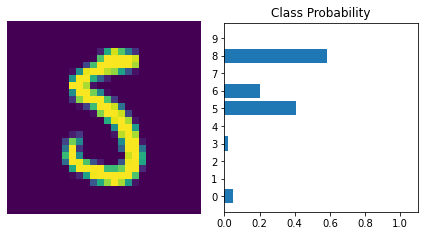

In [128]:
images, labels = next(iter(valloader))
#images, labels = images.to(device), labels.to(device)

img = images[0].view(1, 784)
img_gpu = img.to(device)
with torch.no_grad():
    out = model(img_gpu)

ps = out.cpu()
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
helper.view_classify(img.view(1, 28, 28), ps)

In [114]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  images, labels = images.to(device), labels.to(device)
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        out = model(img)

    
    ps = out.cpu()
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu().numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.8757
